In [224]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

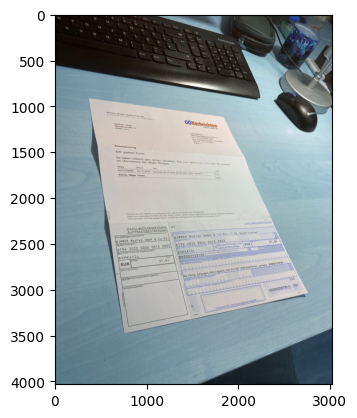

In [225]:
img = cv2.imread("data/ooen.jpg")
plt.imshow(img)
plt.show()

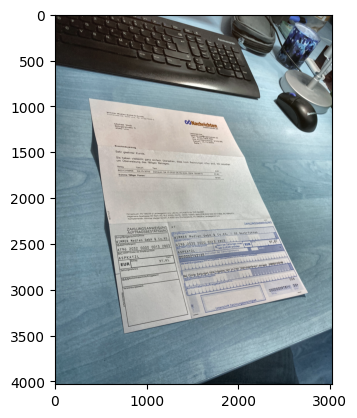

In [226]:
def claheRGB(img):

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l,a,b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(5,5))
    l = clahe.apply(l)
    lab = cv2.merge((l,a,b))
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return bgr

# create a CLAHE object (Arguments are optional).
img = claheRGB(img)
plt.imshow(img)

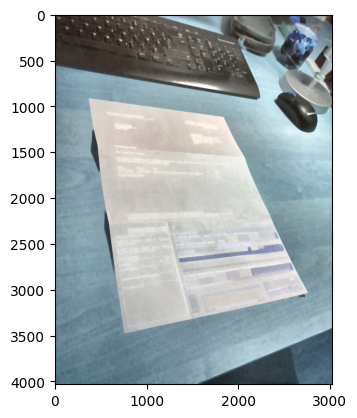

In [227]:
# Repeated Closing operation to remove text from the document.
kernel = np.ones((5,5),np.uint8)
whiteBill = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=5)
plt.imshow(whiteBill)

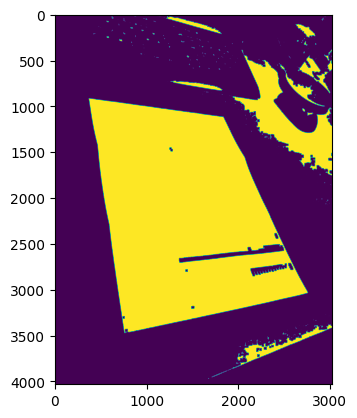

In [228]:
# threshold on white
# Define lower and uppper limits
lower = np.array([175,175,175])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(whiteBill, lower, upper)

plt.imshow(thresh)

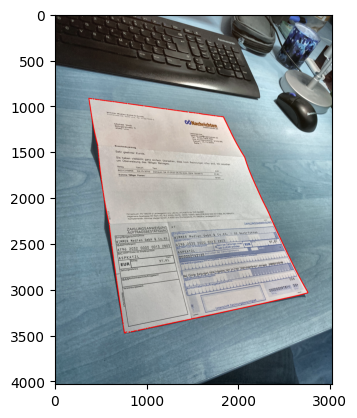

In [229]:
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = max(contours, key = cv2.contourArea)
rgb = img.copy()
f = cv2.drawContours(rgb, c, -1, (255,0,0), 10)
plt.imshow(f)

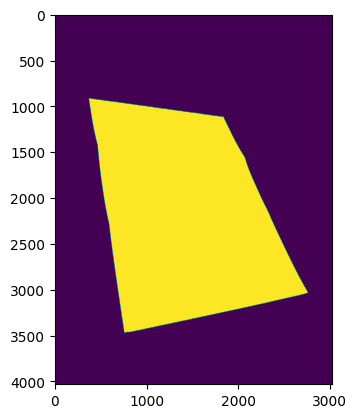

In [230]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(gray)
cv2.drawContours(mask, [c], -1, color=255, thickness=cv2.FILLED)

plt.imshow(mask)

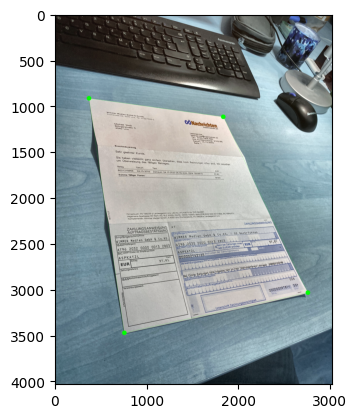

In [232]:
perimeter = cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, 0.05 * perimeter, True)
A = img.copy()

# drawing points
for point in approx:
    x, y = point[0]
    cv2.circle(A, (x, y), 25, (0, 255, 0), -1)

# drawing skewed rectangle
cv2.drawContours(A, [approx], -1, (0, 255, 0))

plt.imshow(A)